In [1]:
## For Data
import numpy as np
import pandas as pd
import datetime
import re

## For Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
df1 = pd.read_excel('https://github.com/danielpetterson/darkwebmarkets/raw/master/mastersr2-1.xlsx')
df2 = pd.read_excel('https://github.com/danielpetterson/darkwebmarkets/raw/master/mastersr2-2.xlsx')

In [3]:
# Combine dataframes
dfdnm = pd.concat([df1, df2],ignore_index = True)
dfdnm.head()

,Title,Sellerid,PriceUSD,PriceBTC,Rating,Reviews,Origin,Destination,Category,Subcategory,Market,Date
0,Ray Ban Tech RB3460 001 Aviator/Flip Out/ Sung...,FoxyGirl,61.1615,0.098232,NaN,NaN,China,Worldwide,Apparel,None,SilkRoad2,2014-07-17
1,Ray Ban RB3025 Aviator Classic Sunglasses Replica,FoxyGirl,37.9626,0.060972,NaN,NaN,China,Worldwide,Apparel,None,SilkRoad2,2014-07-17
2,Rolex - Watch Box (AAA Grade Replica),RepAAA,100.43,0.161301,NaN,NaN,"Hong Kong, (China)",Worldwide,Apparel,None,SilkRoad2,2014-07-17
3,Ray Ban RB3016 - W0365 | Clubmaster Sunglasses...,FoxyGirl,45.3438,0.072827,NaN,NaN,China,Worldwide,Apparel,None,SilkRoad2,2014-07-17
4,Rolex - Submariner 2Tone YG/SS Black [Replica],RepAAA,149.635,0.24033,NaN,NaN,"Hong Kong, (China)",Worldwide,Apparel,None,SilkRoad2,2014-07-17


### Check for Missing Values
The vast majority of missing values are found in the Rating and Reviews columns. This is because earlier versions of the online marketplace didn't have these features.

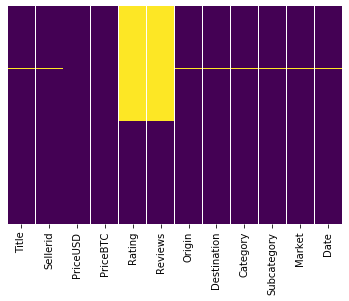

In [4]:
sns.heatmap(dfdnm.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis')

In [5]:
# # Drop Rating and Review columns from df
# dfdnm = dfdnm.drop(['Rating','Reviews'], axis=1)

In [6]:
region_dict = {
    
    'Unknown': 'Unknown',
    'China': 'Asia',
    'Hong Kong, (China)': 'Asia',
    'Undeclared': 'Unknown',
    'India': 'Asia',
    'Canada': 'North America',
    'United States': 'North America',
    'Netherlands': 'EU',
    'United Kingdom': 'EU',
    'Germany': 'EU',
    'Belgium': 'EU',
    'South Africa': 'Africa',
    'Australia': 'Oceania',
    'Spain': 'EU',
    'Czech Republic': 'EU',
    'Sweden': 'EU',
    'Finland': 'EU',
    'New Zealand': 'Oceania',
    'Norway': 'Non-EU Europe',
    'Poland': 'EU',
    'Austria': 'EU',
    'Switzerland': 'Non-EU Europe',
    'Denmark': 'EU',
    'Ireland': 'EU',
    'Italy': 'EU',
    'Bulgaria': 'EU',
    'Slovenia': 'EU',
    'Armenia': 'Non-EU Europe',
    'Slovakia': 'EU',
    'Latvia': 'EU',
    'France': 'EU',
    'Hungary': 'EU',
    'Singapore': 'Asia',
    'Germany\n]': 'EU',
    'Colombia': 'Latin America',
    'Malaysia': 'Asia',
    'Israel': 'Middle East',
    'Japan': 'Asia',
    'Vatican (Holy See)': 'EU',
    'Angola': 'Africa',
    'Greece': 'EU',
    'Paraguay': 'Latin America',
    'Albania': 'Non-EU Europe',
    'Panama': 'Latin America',
    'Luxembourg': 'EU',
    'Kosovo': 'Non-EU Europe',
    'Mexico': 'North America',
    'Monaco': 'EU',
    'Argentina': 'Latin America',
    'Bolivia': 'Latin America',
    'Ukraine': 'Non-EU Europe',
    'Croatia': 'EU',
    'Denmark': 'EU',
    'Lithuania': 'EU',
    'Romania': 'EU',
    'Reunion': 'Africa',
    'Saint Martin': 'Latin America',
    'Moldova': 'Non-EU Europe',
    'Central America': 'Latin America',
    'Tuvalu': 'Oceania',
    'Thailand': 'Asia',
    'Afghanistan': 'Asia',
    'European union': 'EU',
    'Belgium': 'EU',
    'Spain': 'EU', 
    'Hungary': 'EU',
    'Philippines': 'Asia',
    'EU':'EU'
     
}

country_dict = {
    'China': 'China',
    'Hong Kong, (China)': 'China',
    'Undeclared': 'Unknown',
    'India': 'India',
    'Canada': 'Canada',
    'United States': 'United States',
    'Netherlands': 'Netherlands',
    'United Kingdom': 'United Kingdom',
    'Germany': 'Germany',
    'Belgium': 'Belgium',
    'South Africa': 'South Africa',
    'Australia': 'Australia',
    'Spain': 'Spain',
    'Czech Republic': 'Czech Republic',
    'Sweden': 'Sweden',
    'Finland': 'Finland',
    'New Zealand': 'New Zealand',
    'Norway': 'Norway',
    'Poland': 'Poland',
    'Austria': 'Austria',
    'Switzerland': 'Switzerland',
    'Denmark': 'Denmark',
    'Ireland': 'Ireland',
    'Italy': 'Italy',
    'Bulgaria': 'Bulgaria',
    'Slovenia': 'Slovenia',
    'Armenia': 'Armenia',
    'Slovakia': 'Slovakia',
    'Latvia': 'Latvia',
    'France': 'France',
    'Hungary': 'Hungary',
    'Singapore': 'Singapore',
    'Germany\n]': 'Germany',
    'Colombia': 'Colombia',
    'Malaysia': 'Malaysia',
    'Israel': 'Israel',
    'Japan': 'Japan',
    'Vatican (Holy See)': 'Holy See',
    'Angola': 'Angola',
    'Greece': 'Greece',
    'Paraguay': 'Paraguay',
    'Albania': 'Albania',
    'Panama': 'Panama',
    'Luxembourg': 'Luxembourg',
    'Kosovo': 'Kosovo',
    'Mexico': 'Mexico',
    'Monaco': 'Monaco',
    'Argentina': 'Argentina',
    'Bolivia': 'Bolivia',
    'Ukraine': 'Ukraine',
    'Croatia': 'Croatia',
    'Denmark / UK (Top #4 Seller)': 'United Kingdom',
    'Lithuania': 'Lithuania',
    'Romania': 'Romania',
    'Reunion (FR)': 'Reunion',
    'Saint Martin (FR)': 'Saint Martin',
    'Moldova, Republic of': 'Moldova',
    'Central America': 'Central America',
    'Tuvalu': 'Tuvalu',
    'Thailand': 'Thailand',
    'Afghanistan': 'Afghanistan',
    'European union': 'EU',
    'Belgium': 'Belgium',
    'Spain': 'Spain', 
    'Hungary': 'Hungary',
    'Philippines': 'Philippines'
}

destination_dict = {
    'Worldwide': 'Worldwide',
    'Canada': 'Canada',
    'United States': 'United States',
    'Worldwide except Australia': 'Worldwide ex AUS',
    'European Union': 'EU',
    'Undeclared': 'Undeclared',
    'Australia': 'Australia',
    'Sweden': 'Sweden',
    'Germany': 'Germany',
    'United Kingdom': 'United Kingdom',
    'United States &amp; Canada': 'United States and Canada', 
    'New Zealand': 'New Zealand',
    'Norway': 'Norway',
    'Finland': 'Finland',
    'Ireland': 'Ireland',
    'China': 'China',
    'Switzerland': 'Switzerland',
    'Denmark': 'Denmark',
    'Azerbaijan': 'Azerbaijan',
    'Netherlands': 'Netherlands',
    'Italy': 'Italy',
    'France': 'France',
    'European Union / UK / Worldwide': 'Worldwide',
    'Worldwide\n ]': 'Worldwide',
    'United States & Canada': 'United States and Canada',
    'Argentina': 'Argentina',
    'Mexico': 'Mexico',
    'Japan': 'Japan',
    'Tuvalu': 'Tuvalu',
    'Belgium': 'Belgium',
    'Spain': 'Spain',
    'Hungary': 'Hungary',
    'Philippines': 'Philippines'
}

# Map keys to values
dfdnm['Origin'] = dfdnm['Origin'].map(country_dict)
dfdnm['Origin_region'] = dfdnm['Origin'].map(region_dict)
dfdnm['Destination'] = dfdnm['Destination'].map(destination_dict)

In [7]:
dfdnm['Origin'].value_counts()

country_dict_num = {
 'China': 1,
 'India': 2,
 'Canada': 3,
 'United States': 4,
 'Netherlands': 5,
 'United Kingdom': 6,
 'Germany': 7,
 'Belgium': 8,
 'South Africa': 9,
 'Australia': 10,
 'Spain': 11,
 'Czech Republic': 12,
 'Sweden': 13,
 'Finland': 14,
 'New Zealand': 15,
 'Norway': 16,
 'Poland': 17,
 'Austria': 18,
 'Switzerland': 19,
 'Denmark': 20,
 'Ireland': 21,
 'Italy': 22,
 'Bulgaria': 23,
 'Slovenia': 24,
 'Armenia': 25,
 'Slovakia': 26,
 'Latvia': 27,
 'France': 28,
 'Hungary': 29,
 'Singapore': 30,
 'Colombia': 31,
 'Malaysia': 32,
 'Israel': 33,
 'Japan': 34,
 'Holy See': 35,
 'Angola': 36,
 'Greece': 37,
 'Paraguay': 38,
 'Albania': 39,
 'Panama': 40,
 'Luxembourg': 41,
 'Kosovo': 42,
 'Mexico': 43,
 'Monaco': 44,
 'Argentina': 45,
 'Bolivia': 46,
 'Ukraine': 47,
 'Croatia': 48,
 'Lithuania': 49,
 'Romania': 50,
 'Reunion': 51,
 'Saint Martin': 52,
 'Moldova': 53,
 'Central America': 54,
 'Tuvalu': 55,
 'Thailand': 56,
 'Afghanistan': 57,
 'EU': 58,
 'Philippines': 59}

country_dict_num_inv = {value:key for key, value in country_dict_num.items()}
country_dict_num_inv

{1: 'China',
 2: 'India',
 3: 'Canada',
 4: 'United States',
 5: 'Netherlands',
 6: 'United Kingdom',
 7: 'Germany',
 8: 'Belgium',
 9: 'South Africa',
 10: 'Australia',
 11: 'Spain',
 12: 'Czech Republic',
 13: 'Sweden',
 14: 'Finland',
 15: 'New Zealand',
 16: 'Norway',
 17: 'Poland',
 18: 'Austria',
 19: 'Switzerland',
 20: 'Denmark',
 21: 'Ireland',
 22: 'Italy',
 23: 'Bulgaria',
 24: 'Slovenia',
 25: 'Armenia',
 26: 'Slovakia',
 27: 'Latvia',
 28: 'France',
 29: 'Hungary',
 30: 'Singapore',
 31: 'Colombia',
 32: 'Malaysia',
 33: 'Israel',
 34: 'Japan',
 35: 'Holy See',
 36: 'Angola',
 37: 'Greece',
 38: 'Paraguay',
 39: 'Albania',
 40: 'Panama',
 41: 'Luxembourg',
 42: 'Kosovo',
 43: 'Mexico',
 44: 'Monaco',
 45: 'Argentina',
 46: 'Bolivia',
 47: 'Ukraine',
 48: 'Croatia',
 49: 'Lithuania',
 50: 'Romania',
 51: 'Reunion',
 52: 'Saint Martin',
 53: 'Moldova',
 54: 'Central America',
 55: 'Tuvalu',
 56: 'Thailand',
 57: 'Afghanistan',
 58: 'EU',
 59: 'Philippines'}

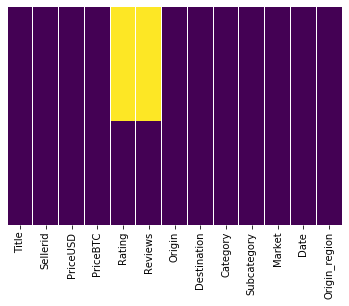

In [8]:
#dfdnm.Origin_region.isnull().sum()
sns.heatmap(dfdnm.isnull(),
           yticklabels=False,
           cbar=False,
           cmap='viridis')

### Cocaine Data

In [9]:
# Subset obs to titles containing 'Cocaine' within Cocaine subcategory
key = re.compile('COCAINE')
filt = (dfdnm['Title']
         .str.upper()
         .str.contains(key))
dfcoca = dfdnm[(filt.fillna(False))&(dfdnm['Subcategory'] == 'Cocaine')].copy()

# Extract product purity
dfcoca['Purity'] =  (dfcoca['Title']
                     .str.extract(r'(\d+(?:\.\d+)?%)'))
dfcoca['Purity'] =   (dfcoca['Purity']
                     .str.extract(r'(\d+)')
                     .astype(float))

# Fill NAs in Purity with median value of Seller listing
dfcoca['Purity'] = dfcoca.Purity.fillna(dfcoca.groupby('Sellerid').Purity.transform('median'))

# Fill remaining NAs with median value of origin region
dfcoca['Purity'] = dfcoca.Purity.fillna(dfcoca.groupby('Origin_region').Purity.transform('median'))

# List of sellers with improper purity values
sellerpure =['NSWGreat','MasterSwe','christian2356']
# Replace values with median
dfcoca.loc[(dfcoca.Sellerid.isin(sellerpure),'Purity')]= dfcoca.Purity.median()

dfcoca['Title1'] = dfcoca['Title'].str.replace(r'(\d+(?:\.\d+)?%)', '')

# Extract quantity of units
dfcoca['Quantitytext'] = (dfcoca['Title1']
                      .str.upper()
                      .str.replace('ONE', '1')
                      .str.replace(',', '.')
                      .str.replace('1/8', '0.125')
                      .str.replace('1/4', '0.25')
                      .str.replace('1/2', '0.5')
                      .str.extract(r'(\d+(?:\.\d+)?.?G?O?K?)')
                      .fillna('NA'))
dfcoca['Quantity'] =  (dfcoca['Quantitytext']
                      .str.extract(r'(\d+(?:\.\d+)?)')
                      .astype(float))

dfcoca.loc[(dfcoca.Quantitytext.str.contains('K')),'Grams']=1000
dfcoca.loc[(dfcoca.Quantitytext.str.contains('O')),'Grams']=28
dfcoca['Grams'] = dfcoca['Grams'].fillna(1)
dfcoca['Quantity'] = dfcoca['Grams'] * dfcoca['Quantity']

dfcoca['Quantity'] = dfcoca.Quantity.fillna(1)

# Calculate price per unit
dfcoca['Gram_Price'] = dfcoca['PriceUSD']/dfcoca['Quantity']


# Retain only most recent listing scrape values
dfcoca = dfcoca.drop_duplicates(subset=['Title', 'Market'], keep='last')

dfcoca.drop(['Title1', 'Quantitytext', 'Rating', 'Reviews'], axis=1, inplace = True)

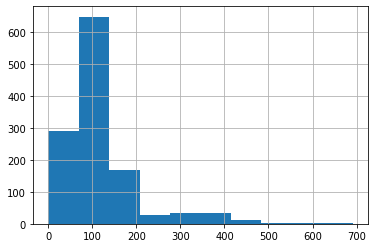

In [13]:
dfcoca[dfcoca['Gram_Price'] < 700]['Gram_Price'].hist()